# **Pediatric Pneumonia Detection: Advancing Healthcare through Expert-Validated CNN Analysis of Chest X-rays**

## Utilizing chest X-ray images from pediatric patients, this CNN project focuses on the classification of pneumonia and normal cases. The dataset, meticulously curated for quality and accuracy, underwent expert grading for diagnoses. The AI system was trained on high-quality scans to ensure robust performance, with evaluation sets cross-checked by additional experts for validation.

In [ ]:
import numpy as np
import pandas as pd
import os
import zipfile
import seaborn as sns
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# zip_folder = zipfile.ZipFile('/content/drive/MyDrive/pneumonia_diagnosis_cnn_project/modified_chest_xray.zip','r')
# zip_folder.extractall()
# zip_folder.close()

In [ ]:
# setting batch size
train_dir_path = '/content/drive/MyDrive/pneumonia_diagnosis_cnn_project/modified_chest_xray/train_df'
test_dir_path = '/content/drive/MyDrive/pneumonia_diagnosis_cnn_project/modified_chest_xray/test_df'

train_data = keras.preprocessing.image_dataset_from_directory(train_dir_path,
                                                             batch_size = 32,
                                                             image_size = (224,224),
                                                             label_mode = 'binary')
test_data = keras.preprocessing.image_dataset_from_directory(test_dir_path,
                                                             batch_size = 32,
                                                             image_size = (224,224),
                                                             label_mode = 'binary')

# data augmenation
data_augmention = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(20),
    layers.RandomZoom(0.2),
    layers.RandomWidth(0.2),
    layers.RandomHeight(0.2)
])

# creating model checkpoint
chk_path = 'model_checkpoint/checkpoint.ckpt'
callback = keras.callbacks.ModelCheckpoint(filepath = chk_path,
                                           save_weights_only = True,
                                           save_best_only = False,
                                           save_freq = 'epoch')

# creating model
base_model = keras.applications.EfficientNetB0(include_top= False)
base_model.trainable = True
md_layers = base_model.layers
tr1_layer = md_layers[:-80]
for layer1 in tr1_layer:
  layer1.trainable = False

# defining layers and inputs of the model
inputs = layers.Input(shape = (224,224,3))
x = data_augmention(inputs)
x = base_model(x)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(1,activation = 'sigmoid')(x)
model_1 = keras.Model(inputs,outputs)

# compiling the model
model_1.compile(loss = 'binary_crossentropy',
                optimizer = keras.optimizers.Adam(lr = 0.001),
                metrics = ['accuracy'])



Found 1000 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
# fitting the model
history_1 = model_1.fit(train_data,
                        epochs = 10,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        callbacks = [callback]  )

In [ ]:
len(base_model.layers)

238

In [ ]:
model_1.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 sequential_6 (Sequential)   (None, None, None, 3)     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d_5  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_5 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 4050852 (15.45 MB)
Trainable params: 3232509 

<Axes: >

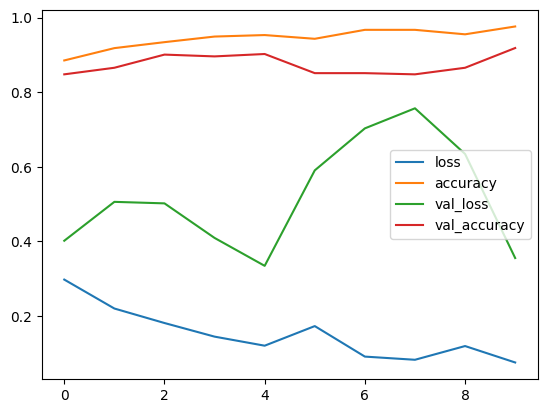

In [ ]:
pd.DataFrame(history_1.history).plot()

In [ ]:
base_model.trainable = True
md_layers = base_model.layers
tr1_layer = md_layers[:-100]
for layer1 in tr1_layer:
  layer1.trainable = False

# compiling the model
model_1.compile(loss = 'binary_crossentropy',
                optimizer = keras.optimizers.Adam(lr = 0.0001),
                metrics = ['accuracy'])

# fitting the model
history_2 = model_1.fit(train_data,
                        epochs = 15,
                        steps_per_epoch = len(train_data),
                        initial_epoch = history_1.epoch[-1],
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        callbacks = [callback]  )

Epoch 10/15
32/32 [==============================] - 40s 497ms/step - loss: 0.1214 - accuracy: 0.9570 - val_loss: 0.4066 - val_accuracy: 0.8990
Epoch 11/15
32/32 [==============================] - 17s 474ms/step - loss: 0.1333 - accuracy: 0.9590 - val_loss: 0.3598 - val_accuracy: 0.8878
Epoch 12/15
32/32 [==============================] - 16s 459ms/step - loss: 0.0849 - accuracy: 0.9700 - val_loss: 0.4092 - val_accuracy: 0.9071
Epoch 13/15
32/32 [==============================] - 22s 644ms/step - loss: 0.0783 - accuracy: 0.9760 - val_loss: 0.5354 - val_accuracy: 0.8734
Epoch 14/15
32/32 [==============================] - 17s 470ms/step - loss: 0.0845 - accuracy: 0.9690 - val_loss: 0.4867 - val_accuracy: 0.8734
Epoch 15/15
32/32 [==============================] - 20s 588ms/step - loss: 0.0770 - accuracy: 0.9730 - val_loss: 0.7910 - val_accuracy: 0.8349


<Axes: >

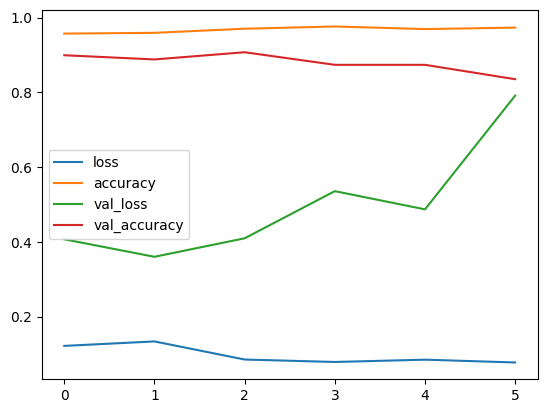

In [ ]:
pd.DataFrame(history_2.history).plot()

In [ ]:
# fitting the model
history_3 = model_1.fit(train_data,
                        epochs = 20,
                        steps_per_epoch = len(train_data),
                        initial_epoch = history_2.epoch[-1],
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        callbacks = [callback]  )

Epoch 15/20
32/32 [==============================] - 16s 443ms/step - loss: 0.1086 - accuracy: 0.9640 - val_loss: 0.9440 - val_accuracy: 0.8494
Epoch 16/20
32/32 [==============================] - 18s 518ms/step - loss: 0.0730 - accuracy: 0.9740 - val_loss: 0.2611 - val_accuracy: 0.9183
Epoch 17/20
32/32 [==============================] - 18s 452ms/step - loss: 0.0591 - accuracy: 0.9790 - val_loss: 0.2746 - val_accuracy: 0.9199
Epoch 18/20
32/32 [==============================] - 18s 490ms/step - loss: 0.0568 - accuracy: 0.9770 - val_loss: 0.2531 - val_accuracy: 0.9215
Epoch 19/20
32/32 [==============================] - 16s 440ms/step - loss: 0.0606 - accuracy: 0.9780 - val_loss: 0.3229 - val_accuracy: 0.9279
Epoch 20/20
32/32 [==============================] - 17s 462ms/step - loss: 0.0645 - accuracy: 0.9740 - val_loss: 0.3019 - val_accuracy: 0.9295


<Axes: >

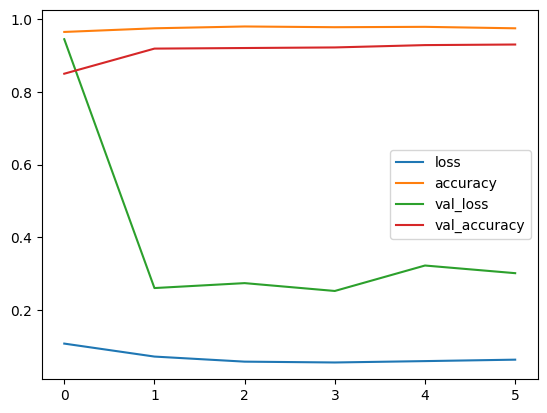

In [ ]:
pd.DataFrame(history_3.history).plot()

In [ ]:
model_1.save('tr97ts92.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
load_model = keras.models.load_model("/content/drive/MyDrive/pneumonia_diagnosis_cnn_project/tr97ts92.h5")

In [ ]:
# making the prdiction on the data
classes = os.listdir(test_dir_path)
test_label = [ len(os.listdir(os.path.join(test_dir_path,cls))) * ['NORMAL']
              if cls == "NORMAL"
               else len(os.listdir(os.path.join(test_dir_path,cls))) * ["PNEUMONIA"]
               for cls in classes ]
test_label

[['NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'NORMAL',
  'N

In [ ]:
test_label_binary = [i for i,cls in enumerate(test_label) for  label in cls]
test_label_binary

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
# test image list
test_img_list = [ os.listdir(os.path.join(test_dir_path,cls)) for cls in classes]
test_img_list[0][0]

'IM-0005-0001.jpeg'

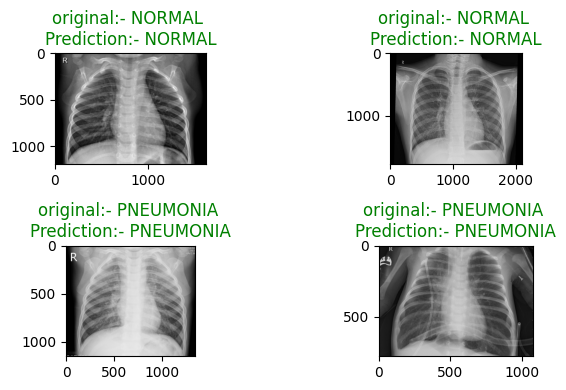

In [ ]:
import os
import cv2 as cv
import matplotlib.pyplot as plt

def make_a_prediction(img_path, model, classes):
    class_name = ['NORMAL', 'PNEUMONIA']
    image = cv.imread(img_path)
    image = cv.resize(image, (224, 224))
    image = image.reshape((1, 224, 224, 3))
    pred = model.predict(image, verbose=0)
    pred_ind = int(np.round(pred.squeeze()))
    output = class_name[pred_ind]
    return output

def make_prediction_plot(dir_path=None, classes=None, img=None, img_list=None, model=None):
    if isinstance(classes, list) and len(classes) > 1:
        class_name = ['NORMAL', 'PNEUMONIA']
        a = 0
        figs, axes = plt.subplots(2, 2, figsize=(10, 4))
        ax = axes.flatten()

        for name_list, cls in zip(img_list, classes):
            for image_name in name_list:
                image_path = os.path.join(dir_path, cls, image_name)
                pred = make_a_prediction(image_path, model=model, classes=classes)
                image = cv.imread(image_path)
                ax[a].imshow(image)
                if pred == cls:
                    ax[a].set_title(f"original:- {cls} \nPrediction:- {pred}", color='green')
                else:
                    ax[a].set_title(f"original:- {cls} \nPrediction:- {pred}", color='red')
                plt.tight_layout()
                a += 1
        plt.show()
    else:
        image_path = os.path.join(dir_path, classes, img)
        pred = make_a_prediction(image_path, model=model, classes=classes)
        image = cv.imread(image_path)
        image = cv.resize(image, (224, 224))
        plt.imshow(image)
        if pred == classes:
            plt.title(f"original:- {classes} \nPrediction:- {pred}", color='green')
        else:
            plt.title(f"original:- {classes} \nPrediction:- {pred}", color='red')
        plt.show()


# import random
sample_img_list = [ random.sample(img_list,2) for img_list,cls in zip(test_img_list,classes)]
make_prediction_plot(dir_path=test_dir_path, classes=classes, img_list=sample_img_list, model=load_model)


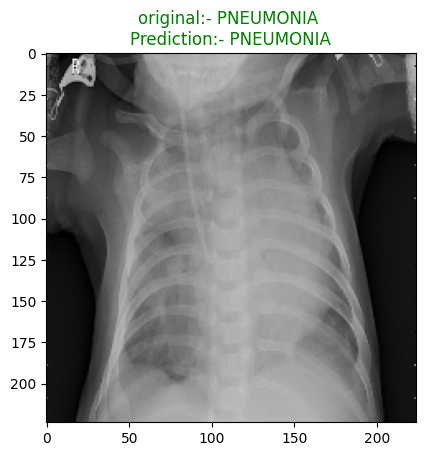

In [ ]:
make_prediction_plot(dir_path=test_dir_path,classes=classes[1],img = test_img_list[1][11],model=load_model)

In [ ]:
# confusion matrics
from sklearn.metrics import confusion_matrix,accuracy_score
pred_test = []
for img_list,cls in zip(test_img_list,classes):
  for img in img_list:
    pred = make_a_prediction(os.path.join(test_dir_path,cls,img),load_model,classes)
    if pred == 'NORMAL':
      pred_test.append(0)
    else:
      pred_test.append(1)
pred_test

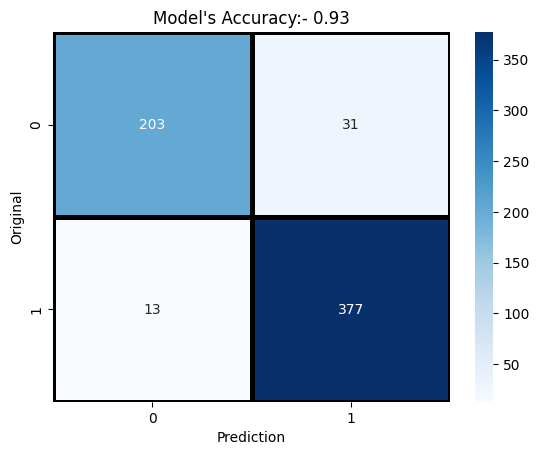

In [ ]:

ac_score = np.round(accuracy_score(test_label_binary,pred_test),2)
cm = confusion_matrix(test_label_binary,pred_test)
sns.heatmap(cm, fmt='d', linewidths=2.5, linecolor='black', annot=True, cmap='Blues')
plt.title(f"Model's Accuracy:- {ac_score}")
plt.xlabel('Prediction')
plt.ylabel('Original')
plt.show()